In [1]:
import cv2
import numpy as np
import pandas as pd
import mediapipe as mp
import matplotlib.pyplot as plt



In [43]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic



## Capturing One frame and drawing landmarks on it.

In [44]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Set up video capture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe Holistic with detection and tracking confidence
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a selfie-view display
        image = cv2.flip(image, 1)

        # Convert the BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and find holistic landmarks
        results = holistic.process(image_rgb)

        # Draw landmarks on the image
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_holistic.FACEMESH_TESSELATION,
                mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
                mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
            )
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=3),
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2, circle_radius=2)
            )
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2)
            )
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(0, 255, 255), thickness=2, circle_radius=2),
                mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2)
            )

        # Convert image from BGR to RGB for Matplotlib
        image_rgb_for_plot = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show the image with landmarks using Matplotlib
        cv2.imshow('showing holstic model working',image_rgb_for_plot)
        # Exit on pressing 'q'
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()

c:\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


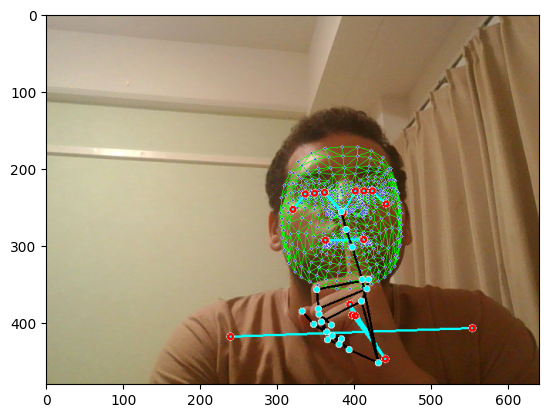

In [45]:
plt.imshow(image_rgb_for_plot)

## Converting Mediapipe results solution to dataframe.

In [48]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks is not None:
    for idx, point in enumerate(results.face_landmarks.landmark):
        face.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
if results.pose_landmarks is not None:
    for idx, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
if results.left_hand_landmarks is not None:
    for idx, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
if results.right_hand_landmarks is not None:
    for idx, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 



## Plotting the dataframes

In [103]:
face['y'] = -face['y']
pose['y'] = -pose['y']
left_hand['y'] = -left_hand['y']
# right_hand['y'] = -right_hand['y']

<Axes: xlabel='x', ylabel='y'>

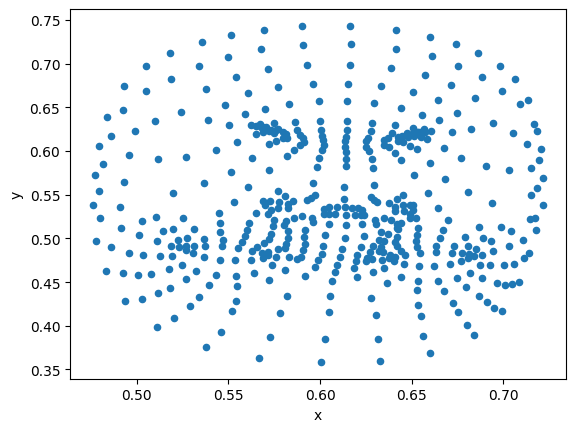

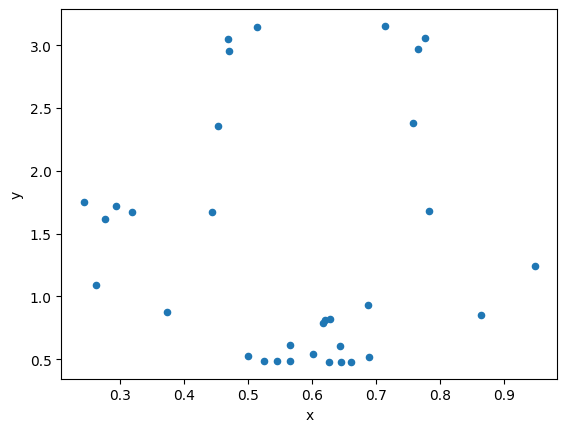

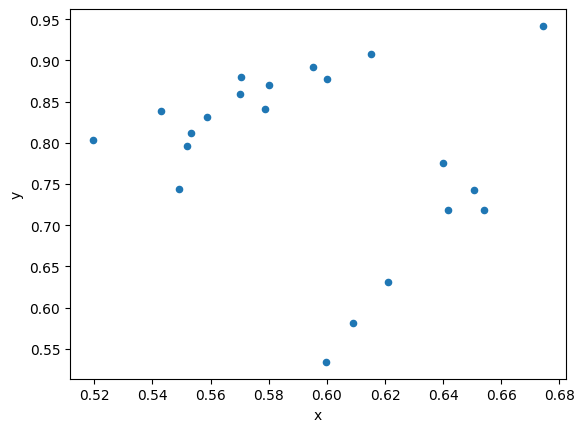

In [104]:
face.plot(x='x',y='y',kind='scatter')
pose.plot(x='x',y='y',kind='scatter')
left_hand.plot(x='x',y='y',kind='scatter')
# right_hand.plot(x='x',y='y',kind='scatter')


## Kaggle Competition Data EDA

In [14]:
train = pd.read_csv('./Data/train.csv')
pq_file = './Data/10042041.parquet'
xyz = pd.read_parquet(pq_file)

In [4]:
train.query('sequence_id == 10042041')
#this parquet file is for sign green.

,path,participant_id,sequence_id,sign
101,train_landmark_files/16069/10042041.parquet,16069,10042041,green


### so we can see that the parquet file contains the frame number with xyz points of either pose, face, left_hand and right_hand

In [5]:
xyz.query('frame == 83')

,frame,row_id,type,landmark_index,x,y,z
0,83,83-face-0,face,0,0.387253,0.381374,-0.051682
1,83,83-face-1,face,1,0.373218,0.342151,-0.070351
2,83,83-face-2,face,2,0.378215,0.357100,-0.043825
3,83,83-face-3,face,3,0.368546,0.311701,-0.041492
4,83,83-face-4,face,4,0.373314,0.330986,-0.071895
...,...,...,...,...,...,...,...
538,83,83-right_hand-16,right_hand,16,NaN,NaN,NaN
539,83,83-right_hand-17,right_hand,17,NaN,NaN,NaN
540,83,83-right_hand-18,right_hand,18,NaN,NaN,NaN
541,83,83-right_hand-19,right_hand,19,NaN,NaN,NaN


## Expected data shape by model
The model must take one or more landmark frames as an input and return a float vector (the predicted probabilities of each sign class) as the output.

In [6]:
ROWS_PER_FRAME = 543 # number of landmarks

def load_relevant_data_subset(pq_path):
    """
    
    function to load data into the correct shape

    this would take the captured landmarks and pivot the data shape from frame
    into number of frames, with each frame having 543 landmark with 3 columns x,y,z
    
    TLDR pivot the data into shape (frame by point by xyz)
    """
    
    data_columns = ['x','y','z']
    data = pd.read_parquet(pq_path,columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames,ROWS_PER_FRAME,len(data_columns))
    return data.astype(np.float32)


### Trying the function 

In [7]:
model_shaped_data = load_relevant_data_subset(pq_file)

In [8]:
model_shaped_data.shape
## we can see that it has 105 frames, each frame having 543 points with coulumns x,y,z

(105, 543, 3)

In [9]:
model_shaped_data[0].shape ## first frame (543 landmarks by 3 columns (cannot have this in pandas))

(543, 3)

## Create the kaggle type format from out detected landmarks (MOST IMPORTANT)

In [10]:
landmarks = pd.DataFrame()

In [11]:
#function that takes results object from mediapipe holistic model and makes it into dataframe
def create_frame_landmark_df(results,frame):
    #skeleton that forms the data shape since we want rows for every landmark index
    #even if they aren't there to have the same shape for the model
    xyz_skeleton = xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True)\
        .copy()
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()

    if results.face_landmarks is not None:
        for idx, point in enumerate(results.face_landmarks.landmark):
            face.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
    if results.pose_landmarks is not None:
        for idx, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
    if results.left_hand_landmarks is not None:
        for idx, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 
    if results.right_hand_landmarks is not None:
        for idx, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[idx,['x','y','z']] = [point.x,point.y,point.z] 


    face = face.reset_index() \
    .rename(columns={'index':'landmark_index'}) \
    .assign(type='face')
    pose = pose.reset_index() \
    .rename(columns={'index':'landmark_index'}) \
    .assign(type='pose')
    left_hand = left_hand.reset_index() \
    .rename(columns={'index':'landmark_index'}) \
    .assign(type='left_hand')
    right_hand = right_hand.reset_index() \
    .rename(columns={'index':'landmark_index'}) \
    .assign(type='right_hand')

    landmarks = pd.concat([face,pose,left_hand,right_hand]).reset_index(drop=True)

    #always have all landmarks even if they don't exist
    landmarks = xyz_skeleton.merge(landmarks,on=['type','landmark_index'],how='left')
    #frame number in the dataframe
    landmarks = landmarks.assign(frame=frame)
    return landmarks

In [140]:
#testing the function on holistic mediapipe results solution only 1 frame

#it has right_hand values even if it's not captured by mediapipe
landmarks = create_frame_landmark_df(results,0)
print(landmarks)

           type  landmark_index         x         y         z  frame
0          face               0  0.614131  0.582515 -0.051401      0
1          face               1   0.61421  0.515498 -0.057976      0
2          face               2  0.613057   0.54568 -0.040597      0
3          face               3  0.601056  0.482661 -0.028995      0
4          face               4  0.613555  0.500775 -0.057107      0
..          ...             ...       ...       ...       ...    ...
538  right_hand              16       NaN       NaN       NaN      0
539  right_hand              17       NaN       NaN       NaN      0
540  right_hand              18       NaN       NaN       NaN      0
541  right_hand              19       NaN       NaN       NaN      0
542  right_hand              20       NaN       NaN       NaN      0

[543 rows x 6 columns]


In [144]:
#landmarks vs parquet file 

print(xyz.query('frame == 83'))

     frame            row_id        type  landmark_index         x         y  \
0       83         83-face-0        face               0  0.387253  0.381374   
1       83         83-face-1        face               1  0.373218  0.342151   
2       83         83-face-2        face               2  0.378215  0.357100   
3       83         83-face-3        face               3  0.368546  0.311701   
4       83         83-face-4        face               4  0.373314  0.330986   
..     ...               ...         ...             ...       ...       ...   
538     83  83-right_hand-16  right_hand              16       NaN       NaN   
539     83  83-right_hand-17  right_hand              17       NaN       NaN   
540     83  83-right_hand-18  right_hand              18       NaN       NaN   
541     83  83-right_hand-19  right_hand              19       NaN       NaN   
542     83  83-right_hand-20  right_hand              20       NaN       NaN   

            z  
0   -0.051682  
1   -0.